# Erste Energiedatenanalyse

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für diese Einheit:</b></div>
    <ul>
        <li> Erste Energiedaten analysieren </li>
        <li> um die Vorgehensweise mit python kennenzulernen </li>
        <li> und dies in den Projekten anwenden zu können </li>
    </ul>
</div>

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import os.path
import platform
from PIL import Image
import requests
import scipy
from scipy.optimize import curve_fit
from distutils.spawn import find_executable


print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('platform', platform.__version__)
print('Image', Image.__version__)
print('requests', requests.__version__)
print('scipy', scipy.__version__)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.2
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/datetime.py'>
seaborn 0.11.2
plotly 5.1.0
sys 3.9.6 (default, Aug 18 2021, 19:38:01) 
[GCC 7.5.0]
os <module 'os' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/os.py'>
platform 1.0.8
Image 8.3.1
requests 2.26.0
scipy 1.7.1


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)
    #plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

### Funktionen definieren

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>LERNZIELE</b></div>
    <ul>
        <li> Energiedaten mit typischen Darstellungen einlesen und analysieren </li>
        <li> mithilfe eines öffentlich verfügbaren Lastprofils eines Industriebetriebs </li>
        <li> um dies mit weiteren Datensätzen selbst durchführen zu können </li>
    </ul>
</div>

## Energiedaten in jupyter notebook einlesen: Beispiel-Datensatz

unter {cite:p}`minde_household_2017` den Datensatz vom 10.11.2017 in einminütiger Auflösung im Jupyter Notebook Verzeichnis im Unterverzeichnis data speichern.

über den Datensatz gibt es weitere Infos im [Readme](https://data.open-power-system-data.org/household_data/2017-11-10/README.md)

falls Sie den Datensatz verwenden, ist es (wie auch bei allen anderen fremden Datensätzen!) Pflicht, diesen zu zitieren, die Autoren haben dafür sogar einen Vorschlag, den ich übernommen habe

<div class="admonition hint" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Tipp:</b></div>
Die python AG des <a href="https://www.th-koeln.de/anlagen-energie-und-maschinensysteme/cologne-institute-for-renewable-energy_13385.php">CIRE (Cologne Institute for Renewable Energy) der TH Köln</a> hat eine github-Präsenz und dort gibt es ein <a href="https://github.com/cire-thk/Python_AG/blob/master/tutorials/matplotlib_introduction.ipynb">Tutorial zur Nutzung von pandas und matplotlib.</a> 
</div>

## Setup für Datenanalyse

*pandas* für Datenanalyse<br>
*numpy* für Berechnungen<br>
*matplotlib* für Diagramme<br>
*datetime* für Datumsformate<br>
*seaborn* für hübsche Diagramme

## Daten laden

In [3]:
df = pd.read_csv('../data/household_data_1min_singleindex.csv')

zu finden unter: https://data.open-power-system-data.org/household_data/2020-04-15 {cite:p}`minde_household_2017`

generell: stellen Sie im Dateiexplorer ein, dass Sie Dateiendungen sehen wollen (z. B. `xy.csv` statt `xy`)

Unter Microsoft Windows kann man Dateiendungen folgendermaßen einblenden: Systemsteuerung $\to$ Erscheinungsbild und Personalisierung $\to$ Ordneroptionen oder Dateiexploreroption $\to$ Ansichts-Tab, dort unter erweiterte Einstellungen die Option *Für bekannte Dateiformate Dateiendungen verbergen* deaktivieren, dann anwenden und OK klicken.

Unter Mac OS: Finder öffnen $\to$ im Menü Preferences klicken $\to$ Erweitert (Advanced), dort anklicken *alle Dateiendungen anzeigen*.

## aktuellen Pfad in python finden

aktuelles Verzeichnis finden (bitte selbst ausprobieren, mein aktuelles Verzeichnis ist hier nicht abgedruckt!)

<p style="background:black">
<code style="background:black;color:white">import os
</code>
</p>
<p style="background:black">
<code style="background:black;color:white">print(os.getcwd())
</code>
</p>

In [4]:
# hier selbst ausprobieren

alle Dateien im Verzeichnis anzeigen - diese sind direkt mit pandas oder python verfügbar (ohne Pfad)

In [5]:
import os
print(os.listdir(os.getcwd()))

['Beispiel_Datenanalyse.ipynb', 'Datenanalyse_pandas.ipynb', 'Hochaufgeloeste_Daten_downsamplen.ipynb', '.ipynb_checkpoints', '02SYE.ipynb', '02SYE.md', 'SYE-data.ipynb', 'SYE-python-intro.ipynb', 'SYE-first-energydata-analysis.ipynb']


### relative Pfadangabe in python

mit `..` kommt man ein Verzeichnis höher, z. B. `../` ist nur eine Ebene drüber, dort kann man dann das Verzeichnis, dass man öffnen will eingeben

mit Angabe des Verzeichnis in Anführungszeichen (hier jetzt `systemtechnik-fuer-energieeffizienz`) kommt man dort hinein

In [6]:
print(os.listdir("../../systemtechnik-fuer-energieeffizienz"))

['.git', '.ipynb_checkpoints', 'img', 'nb', 'data', '_build', 'teach', 'log', 'specs', 'requirements.txt', '01', 'include', '09', '04', '12', '03', '08', 'cases', '.binder', '02', '13', '14', '15', '16', '17', '18', 'proj', 'audio', 'environment.yml', 'video', '07', '05', '06', '11', '10', '.gitlab-ci.yml', '.gitignore', '_config.yml', 'sye2.bib', 'sye.bib', '_toc.yml', 'README.md']


### absolute Pfadangabe in python

in Windows z. B. `"C:/Dokumente/Susanne/Daten/Test_Datei.csv"`

in Mac oder Linux z. B. `"/home/username/data/energydata/testdata.csv"`

immer in Anführungszeichen

relative Pfade sind besser, denn wenn Ihr Kollege im Projekt die gleiche Datenstruktur hat (z. B. das Notebook in einer Ebene und die Datensätze dort im Verzeichnis `daten/`) dann funktionieren auch die Notebooks weiter

## erster Überblick über die Daten: Anfang

In [7]:
#df.head()

## und Ende

In [8]:
#df.tail()

## Größe des Datensatzes

In [9]:
len(df)

679643

Das ist die Anzahl der Datensätze.

## Datentypen überprüfen

In [10]:
#df.dtypes

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welche Datentypen erkennen Sie im Datensatz, welche nicht?
</div>

*Antwort:...*

## python datetime Objekt

In [11]:
a = dt.datetime(2017, 11, 11)
print(a)

2017-11-11 00:00:00


Mindestangabe für datetime: Jahr, Monat, Tag, weiteres optional:

In [12]:
b = dt.datetime(2017, 11, 11, 11, 11, 11, 11)
print(b)

2017-11-11 11:11:11.000011


### Jahr, Monat, Tag und Zeitstempel ausgeben

In [13]:
a = dt.datetime(2017, 1, 2, 3, 4, 5, 6)
print("Jahr: ", a.year)
print("Monat: ", a.month)
print("Tag: ", a.day)
print("Zeitstempel: ", a.timestamp())

Jahr:  2017
Monat:  1
Tag:  2
Zeitstempel:  1483322645.000006


### Datumswerte konvertieren

USA: mm/dd/yyyy<br>
EU: dd/mm/yyyy<br>
`strftime()` datetime $\to$ string<br>
`strptime()` string $\to$ datetime

### Datumsformat in `datetime` mit `strptime()` konvertieren

In [14]:
datums_string = "11 November, 2021"
print("datums_string = ", datums_string)

datums_string =  11 November, 2021


In [15]:
datums_object = dt.datetime.strptime(datums_string, "%d %B, %Y")
print("datums_object = ", datums_object)

datums_object =  2021-11-11 00:00:00


## Datumswerte in unserem Beispiel

In [16]:
#df.utc_timestamp.head()

Format `%Y-%m-%dT%H%M%SZ` laut Readme

### Datumswerte in unserem Beispiel konvertieren

In [17]:
df['zeit'] = df.utc_timestamp.apply(#
    lambda x: #
    dt.datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))
#df['zeit'].head()

`datetime64[ns]` steht für die Speicherung in Nanosekunden

## Daten in einem Diagramm darstellen

In [18]:
#df.head()

Text(0, 0.5, 'Welche Einheit sehen wir hier?')

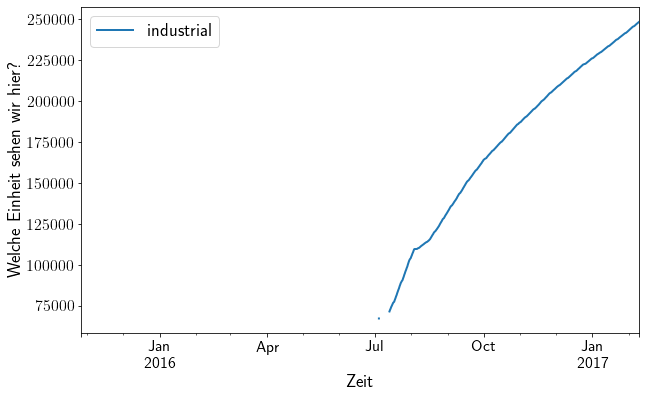

In [19]:
df.rename(columns = {'DE_KN_industrial1_grid_import':'industrial'}, inplace = True)
df.plot(x = 'zeit', y = 'industrial')
plt.xlabel('Zeit')
plt.ylabel('Welche Einheit sehen wir hier?')

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Was sehen wir in diesem Diagramm? Welche Einheit?
</div>

*Antwort:...*

## Energiedaten darstellen in jupyter notebook

nach {cite:p}`walker_tutorial_2019`

### Spalten für Jahr, Monat, Tag, etc. einfügen

In [20]:
df['Jahr'] = df['zeit'].dt.year
df['Monat'] = df['zeit'].dt.month
df['Wochentag'] = df['zeit'].dt.weekday

In [21]:
#df.sample(5)

## Stromlastprofil eines Industrieunternehmens

In [24]:
df['industrialP'] = df['industrial'].diff()

<AxesSubplot:xlabel='zeit'>

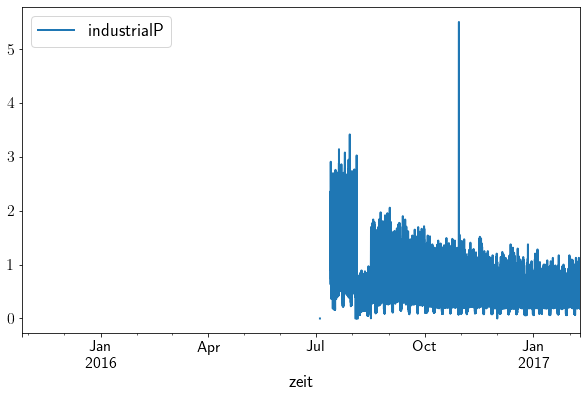

In [25]:
df.plot(x='zeit',y='industrialP')

wobei die y-Achsenbeschriftung noch fehlt: aus dem [Readme des Datensatzes](https://data.open-power-system-data.org/household_data/2017-11-10/README.md) ergibt sich die Energieeinheit zu kWh

x-Achse müsste Anzahl der Werte bezogen auf die Auflösung ergeben

In [26]:
res = df['zeit'][1]-df['zeit'][0]
print('Auflösung '+str(res))

Auflösung 0 days 00:01:00


d.h. die y-Achse hat momentan die Einheit $[dW/dt] = 1\text{ kWh/min.}$ 

In [27]:
dW = 1000*60*60 # kWh in J
dt = 60 # min. in sec
dW_dt_faktor = dW/dt
print('Umrechnungsfaktor zu W ist ' + str(dW_dt_faktor))

Umrechnungsfaktor zu W ist 60000.0


besser ist also, das gleich richtig zu berechnen:

In [29]:
df['industrialP'] = dW_dt_faktor*0.001*df['industrial'].diff()

Text(0, 0.5, 'Leistung [kW]')

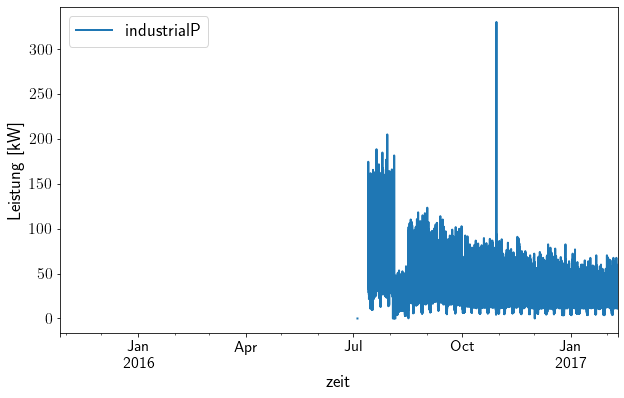

In [30]:
df.plot(x='zeit',y='industrialP')
plt.ylabel('Leistung [kW]')

schwer zu lesen mit so vielen Datenpunkten und leider ist die x-Achse voll mit fehlenden Daten, sie wird nicht gut ausgenutzt

fehlende Werte (`NaN`) weglassen:

In [31]:
df2 = df.dropna(subset=['zeit','industrialP'])

Text(0, 0.5, 'Leistung [kW]')

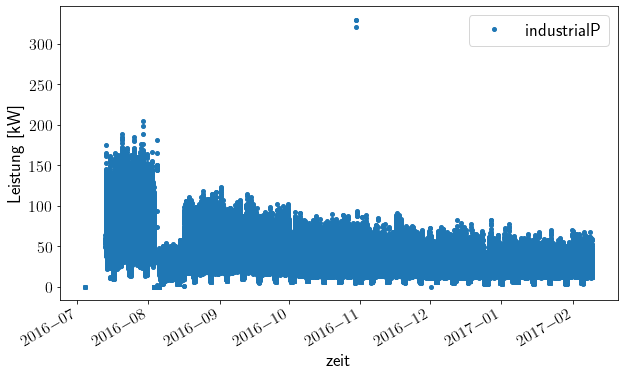

In [32]:
df2.plot(x='zeit',y='industrialP', style='.')
plt.ylabel('Leistung [kW]')

## Dauerlinie

In [33]:
sorted_industrial = sorted(df2['industrialP'], reverse = True)

Text(0, 0.5, 'Leistung [kW]')

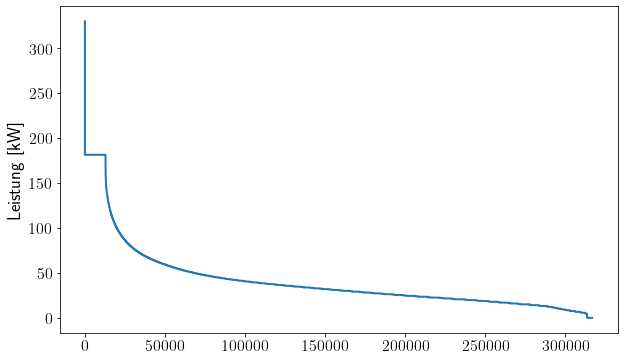

In [34]:
plt.plot(df2.index-df2.index[0],sorted_industrial)
plt.ylabel('Leistung [kW]')

Was sehen wir hier?

zum Vergleich: Minuten in einem Jahr:

In [35]:
no_min_year = 365*24*60
no_min_year

525600

Eine Dauerlinie hat meist drei Bereiche mit Hinweisen für rationellere Energieverwendung:
1. Spitzenlasten, die verschoben werden können
2. unnötige Standby-Verbräuche
3. den mittleren Bereich

Text(210000, 60, 'Standby reduzieren')

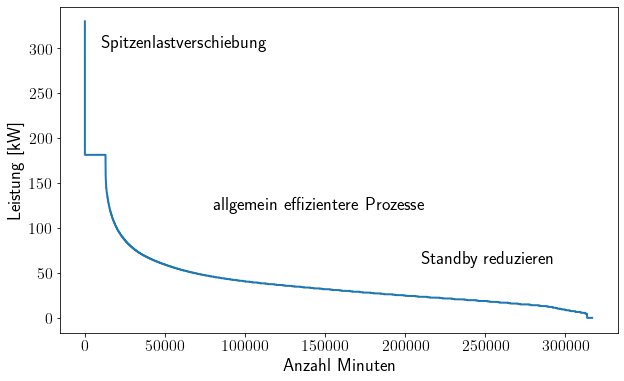

In [40]:
plt.plot(df2.index-df2.index[0],sorted_industrial)
plt.xlabel('Anzahl Minuten')
plt.ylabel('Leistung [kW]')
plt.text(10000,300,'Spitzenlastverschiebung')
plt.text(80000,120,'allgemein effizientere Prozesse')
plt.text(210000,60,'Standby reduzieren')

## Vergleich mit lokaler Solarerzeugung

In [41]:
df.rename(columns = {'DE_KN_industrial1_pv_1':'pv'}, inplace = True)
df['pvP'] = dW_dt_faktor*0.001*df['pv'].diff()
df2 = df.dropna(subset=['zeit','industrialP','pvP'])

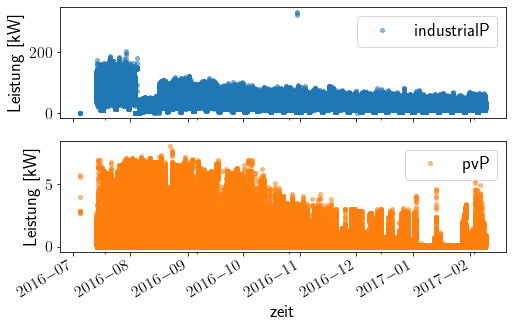

In [42]:
axes = df2.plot(x = 'zeit', y= ['industrialP','pvP'], marker='.',#
                         alpha=0.5, linestyle='None',#
                         figsize=(8,5), subplots=True)
for ax in axes:
    ax.set_ylabel('Leistung [kW]')

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Was sehen Sie? Was fällt auf?
</div>

*Antwort:...*

## Stromlastprofil Januar 2017 genauer ansehen

erst mal als Index den Zeitstempel einstellen

In [43]:
df2.set_index('zeit', inplace = True)

Text(0, 0.5, 'Leistung [kW]')

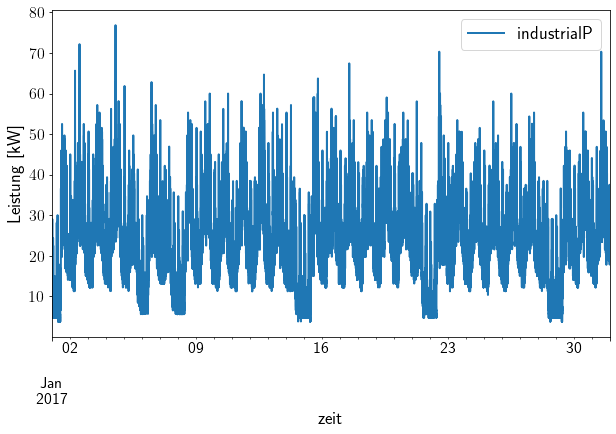

In [44]:
ax = df2.loc['2017-1'].plot(y = 'industrialP',linestyle='-')
plt.ylabel('Leistung [kW]')

höchster Stromverbrauch an Wochentagen und niedrigster unter der Woche?

### Wochentage aus matplotlib

In [45]:
import matplotlib.dates as mdates

### Wöchentliches Gitter im Diagramm

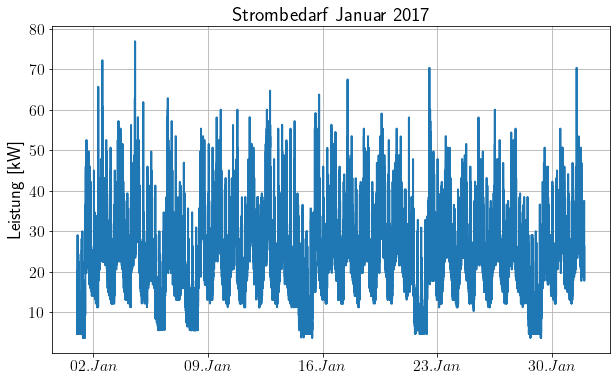

In [47]:
fig, ax = plt.subplots()
ax.plot(df2.loc['2017-1', 'industrialP'], linestyle='-')
ax.set_ylabel('Leistung [kW]')
ax.set_title('Strombedarf Januar 2017')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%b'))
ax.grid()

hier scheint auch sonntags ein erhöhter Bedarf zu sein - das kann man hinterfragen, wenn man den Betrieb kennt und herausfinden, ob z. B. sonntags gearbeitet wird

## Jahreszeitliche Schwankungen mit Boxplots

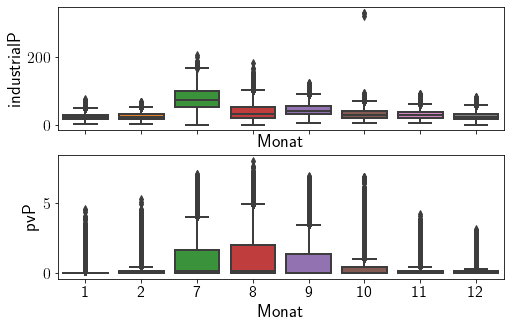

In [48]:
fig, axes = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
for name, ax in zip(['industrialP', 'pvP'], axes):
    sns.boxplot(data=df2, x='Monat', y=name, ax=ax)
if ax != axes[-1]:
    ax.set_xlabel('')

Über einige Monate lässt sich keine Aussage treffen, aufgrund fehlender Daten.

Die Solarerzeugung ist naturgemäß im Sommer höher als im Winter. Das ist plausibel.

Falls mehr Solarfläche vorhanden wäre (z. B. weitere Dachflächen, Fassaden, ggf. auch gemietet), könnte der Anteil lokaler Erzeugung erhöht werden.

Schön ist, dass im Sommer offenbar auch ein höherer Bedarf besteht, so dass eine erhöhte Solarerzeugung diesen auch verringern könnte.

## Wochentagsabhängigkeit des Lastprofils

<AxesSubplot:xlabel='Wochentag', ylabel='industrialP'>

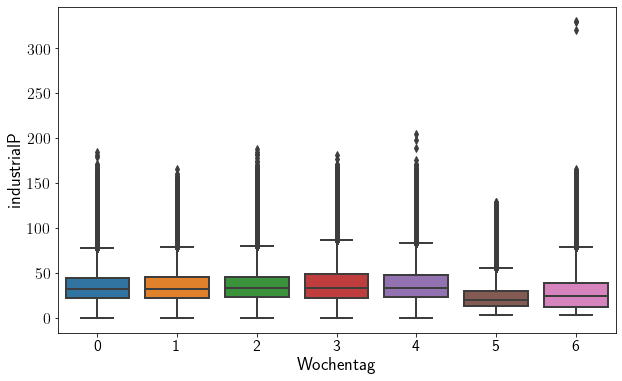

In [49]:
sns.boxplot(data = df2, x = 'Wochentag', y= 'industrialP')

Hier sieht man, dass der Verbrauch deutlich geringer ist am Wochenende, dass es aber ein paar extreme Leistungswerte dann gibt. D.h. entweder geschieht dann ein Hochlauf mit hohem Bedarf oder es handelt sich um vermeidbare Leistungswerte.

## Gleitende Mittelwerte bilden: Fensterung von Daten (*Windowing*)

Im Fenster wird z. B. der Mittelwert gebildet, dann bewegt sich das Fenster einen Wert weiter, es wird
wieder ein Mittelwert gebildet etc.

Beispiel anhand von Zufallszahlen: 

In [50]:
dfr = pd.DataFrame(np.random.rand(100), columns = ["Zahlen"])

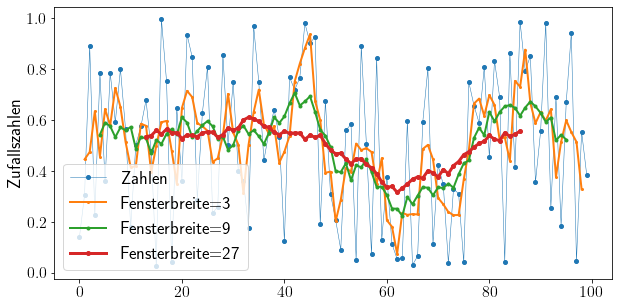

In [53]:
dfr["rollierend3"] = dfr["Zahlen"].rolling(window=3, center=True).mean()
dfr["rollierend9"] = dfr["Zahlen"].rolling(window=9, center=True).mean()
dfr["rollierend27"] = dfr["Zahlen"].rolling(window=27, center=True).mean()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(dfr.loc[:, 'Zahlen'],
marker='.', linestyle='-', linewidth=0.5, label='Zahlen')
ax.plot(dfr.loc[:, 'rollierend3'],
marker='o', markersize=2, linestyle='-', label='Fensterbreite=3')
ax.plot(dfr.loc[:, 'rollierend9'],
marker='o', markersize=3, linewidth =2,linestyle='-', label='Fensterbreite=9')
ax.plot(dfr.loc[:, 'rollierend27'],
marker='o', markersize=4, linewidth =3,linestyle='-', label='Fensterbreite=27')
ax.set_ylabel('Zufallszahlen')
ax.legend();

Je größer das Fenster ``window`` gewählt ist, desto mehr benachbarte Werte werden zur Berechnung des Mittelwerts ``mean`` herangezogen. Dies resultiert in einer besseren Glättung. In dem folgenden Bild ist ein Beispiel für 10 Zufallszahlen und eine Fensterbreite von 3 gegeben.

![Windowing](../img/Windowing.jpg)

Jetzt geht es weiter mit den Energiedaten:

In [55]:
df2_1d = df2['industrialP'].rolling(24*60, center=True).mean()
#df2_1d.head(10)

Fensterungsergebnis, wöchentlicher Mittelwert und Tageswert im Vergleich

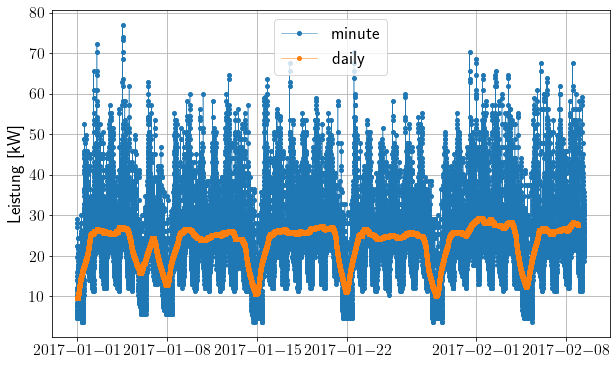

In [57]:
start, end = '2017-01', '2017-02'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end, 'industrialP'], 
       marker = '.', linestyle = '-', linewidth = 0.5,
        label = 'minute')
ax.plot(df2_1d.loc[start:end],
       marker = '.', linestyle = '-', linewidth = 0.5,
        label = 'daily')
ax.set_ylabel('Leistung [kW]')
ax.legend()
ax.grid()

Ergebnis der Glättung der Daten mithilfe einer Fensterung mit einem Rechteckfenster
bzw. dem rollierenden Mittelwert

Fensterungsergebnis hat die gleiche Auflösung wie das ursprüngliche Datenset, aber ist etwas geglättet

Hier kann man Trends und Wiederholungseffekte besser erkennen.

## Histogramm der Leistungswerte

<AxesSubplot:>

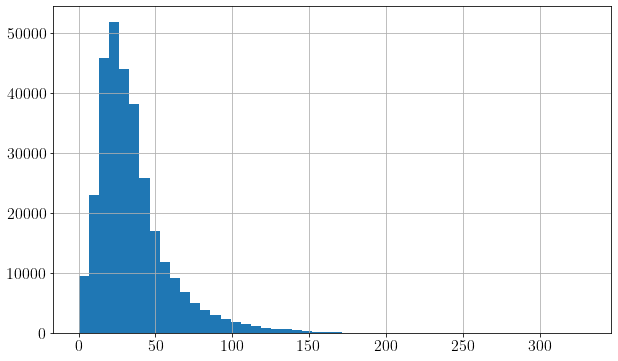

In [58]:
df2['industrialP'].hist(bins = 50)

Hier ist deutlich zu sehen, welche Leistungswerte besonders häufig vorkommen. Allerdings ist die y-Achsen-Skalierung mit Vorsicht zu genießen ...

## Heatmaps erzeugen

Text(0.5, 1.0, 'Leistung [kW] des Stromnetzimports eines Industriebetriebs')

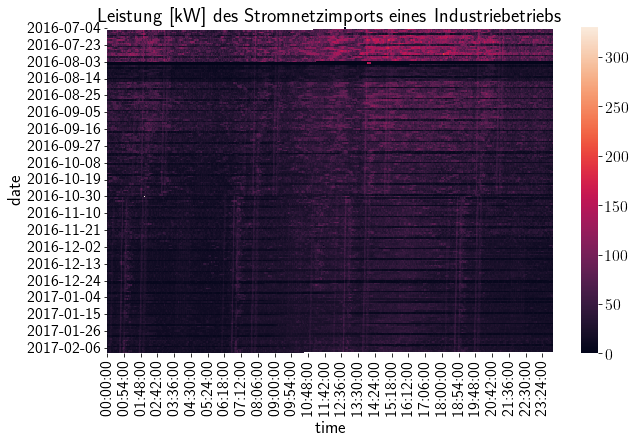

In [59]:
hm_df = pd.DataFrame({'industrialP': df2['industrialP']})
hm_df['date'] = df2.index.date
hm_df['time'] = df2.index.time
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(hm_df.pivot(index = 'date', columns = 'time', values = 'industrialP'))
ax.set_title('Leistung [kW] des Stromnetzimports eines Industriebetriebs')

Es lassen sich hier gewisse Regelmäßigkeiten erkennen: z. B. dass immer wieder dunkle Striche sind, die offenbar im Wochenrhythmus auftreten und suggerieren, dass eine eher geringe Standby-Leistung vorhanden ist. Auch nachts (früh morgens) scheint der Bedarf gering zu sein.

Text(0.5, 1.0, 'Leistung [kW] der Photovoltaikerzeugung eines Industriebetriebs')

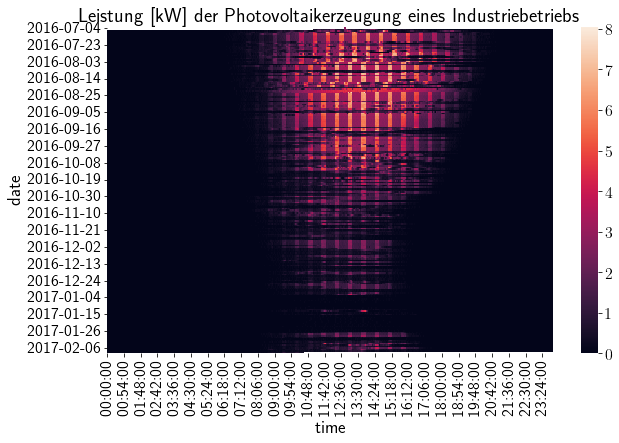

In [60]:
hm2_df = pd.DataFrame({'pvP': df2['pvP']})
hm2_df['date'] = df2.index.date
hm2_df['time'] = df2.index.time
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(hm2_df.pivot(index = 'date', columns = 'time', values = 'pvP'))
ax.set_title('Leistung [kW] der Photovoltaikerzeugung eines Industriebetriebs')

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Was sehen Sie? Was fällt auf?
</div>

*Antwort:...*

## Sankey-Diagramme erzeugen

[namespace(patch=<matplotlib.patches.PathPatch at 0x7fcf4051ef40>,
           flows=array([ 1. , -1. ,  0.5, -0.5]),
           angles=[-1.0, -1.0, 2.0, 2.0],
           tips=array([[-0.25      ,  0.58045018],
                       [ 0.25      , -1.4447228 ],
                       [ 0.79022509,  0.75      ],
                       [-1.2349479 , -0.75      ]]),
           text=Text(0, 0, ''),
           texts=[Text(-0.25000000000000006, 0.7304501844113601, 'input\n1'),
                  Text(0.2500000000000001, -1.5947228045239583, 'output\n1'),
                  Text(0.9402250922056801, 0.7500000000000001, 'third flow (input)\n0.5'),
                  Text(-1.3849478967296383, -0.7500000000000001, 'fourth flow (output)\n0.5')])]

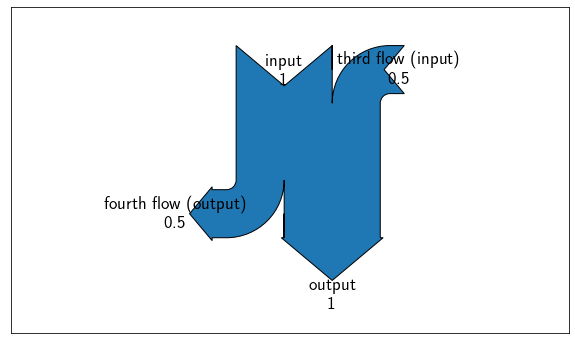

In [61]:
from matplotlib.sankey import Sankey
sankey = Sankey()
sankey.add(flows=[1, -1, 0.5, -0.5],
orientations=[0, 0, 1, -1],
labels=['input', 'output', 'third flow (input)', 'fourth flow (output)'],
rotation=-90)
sankey.finish()

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Erzeugen Sie ein Sankey-Diagramm mit den vorliegenden Energiedaten: Photovoltaik und Strombezug gehen in den Industriebetrieb hinein. Was geht hinaus? Ermitteln Sie die summarischen Werte für einen Monat und stellen Sie diese dar.
</div>

*Antwort:...*

### Formale Anforderungen an ein Sankey-Diagramm

- Breite der Pfeile proportional zur Prozentzahl
- Knotenregel gilt: Summe der Flüsse hinein in ein System muss gleich der Summe der Flüsse hinaus sein
- Flüsse müssen dieselbe Einheit haben, z. B. Energie, Leistung, Material, $CO_2$

### Zum Schmunzeln: ein Sankey-Diagramm ohne Energiebezug

[Wen Trump 2017 auf Twitter am meisten attackierte](https://www.axios.com/who-trump-attacks-the-most-on-twitter-1513305449-f084c32e-fcdf-43a3-8c55-2da84d45db34.html) {cite:p}`kight_who_2017`

## Literatur

```{bibliography}
:filter: docname in docnames
```